In [3]:
import pandas
import configparser
import psycopg2

In [4]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [5]:
conn = psycopg2.connect (
    host = host,
    user = user,
    password = pwd,
    dbname = db)

# Q1

In [7]:
sql = "select * from student"

In [8]:
df = pandas.read_sql_query(sql, conn)
df[:]

/tmp/ipykernel_11821/3166211841.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql, conn)


,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,IA


# Q2

In [20]:
sql = """ select professor.p_name,
course.c_name
from professor
inner join course
on professor.p_email = course.p_email """

In [21]:
df = pandas.read_sql_query(sql, conn)
df[:]

/tmp/ipykernel_11821/3166211841.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql, conn)


,p_name,c_name
0,p2,mongodb
1,p3,facebook
2,p3,postgresql
3,p3,twitter


# Q3

In [31]:
sql = """
select c_number,count(*) as num_student
from enroll
group by c_number
order by c_number desc
"""

/tmp/ipykernel_11821/3710869642.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql, conn)


<Axes: xlabel='c_number'>

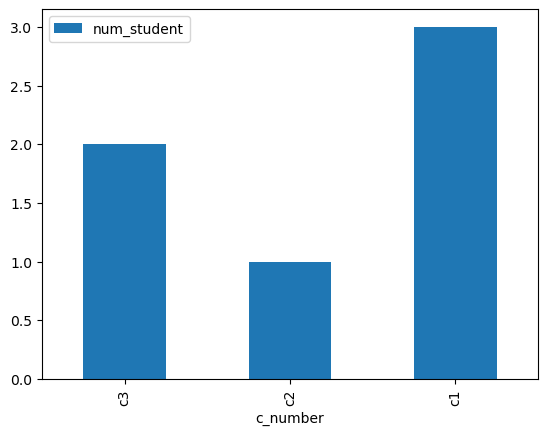

In [32]:
df = pandas.read_sql_query(sql, conn)
df.plot.bar(y='num_student', x='c_number')

# Q4

In [36]:
sql = """
select professor.p_name, count(course.c_name) as num_courses_taught
from professor
inner join course 
on professor.p_email = course.p_email
group by professor.p_name
order by num_courses_taught desc
"""

/tmp/ipykernel_11821/3838300677.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql, conn)


<Axes: xlabel='p_name'>

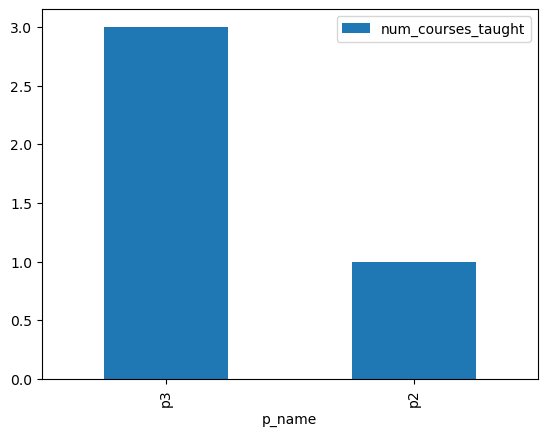

In [37]:
df = pandas.read_sql_query(sql, conn)
df.plot.bar(y='num_courses_taught', x='p_name')

# Q5

In [79]:
cur = conn.cursor()

In [80]:
sql = """
insert into professor (p_email,p_name,office)
values('{}', '{}', '{}')
""".format('p4@jmu.edu','p4','o4')

print(sql)


insert into professor (p_email,p_name,office)
values('p4@jmu.edu', 'p4', 'o4')



In [81]:
cur.execute(sql)

In [82]:
conn.commit()

In [83]:
sql = """ select * from professor
"""

In [84]:
df = pandas.read_sql_query(sql, conn)
df[:]

/tmp/ipykernel_11821/3166211841.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql, conn)


,p_email,p_name,office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [85]:
cur.close()

In [86]:
cur = conn.cursor()

In [87]:
sql = """
insert into course (c_number,c_name,room,p_email)
values('{}', '{}', '{}', '{}')
""".format('c5', 'linkedin','r2','p4@jmu.edu')
print(sql)


insert into course (c_number,c_name,room,p_email)
values('c5', 'linkedin', 'r2', 'p4@jmu.edu')



In [88]:
cur.execute(sql)

In [78]:
conn.commit()

In [89]:
sql = "select * from course"

In [90]:
df = pandas.read_sql_query(sql, conn)
df[:]

/tmp/ipykernel_11821/3166211841.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql, conn)


,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu


In [91]:
cur.close()

# Q6

In [100]:
cur = conn.cursor()

In [101]:
sql = """
update course
set p_email = 'p4@jmu.edu'
where p_email = 'p2@jmu.edu'
"""

In [102]:
cur.execute(sql)

In [103]:
conn.commit()

In [104]:
sql = "select * from course"

In [105]:
df = pandas.read_sql_query(sql, conn)
df[:]

/tmp/ipykernel_11821/3166211841.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql, conn)


,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [106]:
sql= """
delete from professor
where p_email = 'p2@jmu.edu'
"""

In [107]:
cur.execute(sql)

In [108]:
conn.commit()

In [109]:
sql = "select * from professor"

In [110]:
df = pandas.read_sql_query(sql, conn)
df[:]

/tmp/ipykernel_11821/3166211841.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql, conn)


,p_email,p_name,office
0,p3@jmu.edu,p3,o3
1,p4@jmu.edu,p4,o4
